In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
import matplotlib.cm as cm
import folium
from geopy import distance

In [2]:
dataframe = pd.read_csv("./data/Rus_schools_final.csv", encoding='1251')
dataframe.dataframeName = 'Rus_schools_final.csv'
nRow, nCol = dataframe.shape
print(f'There are {nRow} rows and {nCol} columns')
dataframe.head()

There are 42581 rows and 6 columns


,Unnamed: 0,name,struct,addr,lat,lon
0,0,"Муниципальное общеобразовательное учреждение ""...",(Муниципальное образовательное учреждение),"420087, Республика Татарстан, г. Казань, ул.Ри...",55.76370,49.18172
1,1,"Муниципальная образовательная школа-интернат ""...",(Муниципальное образовательное учреждение),"420103, Республика Татарстан, г. Казань, ул.Че...",55.82440,49.12312
2,2,Муниципальное учреждение образования для детей...,(Муниципальное образовательное учреждение),"420100, Республика Татарстан, г. Казань, ул. Ю...",55.74462,49.20560
3,3,"Муниципальное общеобразовательное учреждение ""...",(Муниципальное образовательное учреждение),"420011, Республика Татарстан, г. Казань, Ферма-2",55.71716,49.16222
4,4,Специальное (коррекционное)образовательное учр...,(Государственное образовательное учреждение),"420036, Республика Татарстан, г. Казань, ул.Ти...",55.84911,49.07660


Отобразим на карте лицей №1511 при МИФИ и ближайшие школы.

In [3]:
dataframe.loc[9236]

Unnamed: 0                                                 9236
name          Лицей № 1511 при Московском инженерно-физическ...
struct             (Государственное образовательное учреждение)
addr                115522, Москва,  Пролетарский проспект, 6/3
lat                                                     55.6482
lon                                                     37.6522
Name: 9236, dtype: object

Лицей расположен в центре карты.

In [4]:
center = {"lat": 55.6482, "lon": 37.6522}

In [17]:
map_folium = folium.Map(location = (center["lat"], center["lon"]),
                        tiles = "Stamen Toner",
                        zoom_start = 11)

norm = mpl.colors.Normalize(vmin = 0, vmax = 50000)
cmap = cm.plasma
colormap = cm.ScalarMappable(norm = norm, cmap = cmap)

Обозначим сам лицей другим цветом

In [13]:
dataframe["distance_to_1511"] = dataframe.apply(lambda r: distance.distance( (r["lat"], r["lon"]),
                                                                             (center["lat"], center["lon"]),
                                                                           ).meters, axis = 1)

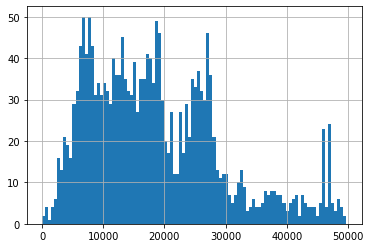

In [18]:
df = dataframe[dataframe["distance_to_1511"] < 5e4]
df["distance_to_1511"].hist(bins = 100)
df = df.reset_index(drop = True)

In [20]:
nRow, nCol = df.shape
for id_ in range(nRow):
    folium.CircleMarker([df["lat"][id_],df["lon"][id_]],
                        radius = 3,
                        fill = True,
                        fill_opacity = 0.9).add_to(map_folium)

folium.CircleMarker([center["lat"],center["lon"]],
                    radius = 3,
                    color = "orange",
                    fill_color = "orange",
                    fill = True,
                    fill_opacity = 0.9).add_to(map_folium)
map_folium